# Train Test Split
--- 
This notebook archives a different method of parsing data, without aggregating the rows by transcript_id and transcript_position group. We believe that this method could generate better model, as it does not lose any information. However, it is also more computationally expensive. To save the model tuning time, we have decided to use the aggregated data for our model.

## Data Processing without Aggregation
The following is what we have done (in order): 
1. Read in data.info and std_merged_data.csv generated in data_processing_without_aggregation.ipynb 
2. Merge data.info with std_merged_data.csv
3. We converted gene_id and transcript_id to integers to find out if they could be used as features. (Outcome: they are not useful)
4. We encoded the 1-mer and 5-mer sequences using label encoder.
5. Train, test split and saved.

In this jupyter notebook, there were also another approach we tried was to process data without aggregation, by converting the -1_flank and +1_flank into seperate rows. For example, a -1_flank of transcript_position=300 would become a new row with transcript_position=299. We were hoping that this would help the model to learn the relationship between different transcript_positions. However, this approach was not successful. We believe that this is because the model is not able to learn the relationship between the transcript_positions. This is because the transcript_positions are not continuous. For example, the transcript_position=300 and transcript_position=301 could be from different transcripts. Therefore, the model is not able to learn the relationship between the two transcript_positions.

In [3]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('../../../dsa4266_tundra_old/data/std_merged_data.csv')

In [6]:
df.shape

(2436760, 31)

In [35]:
info = pd.read_csv("data/data.info")
df = pd.merge(df, info, on=['transcript_id', 'transcript_position'], how='inner')

In [36]:
df.columns

Index(['transcript_id', 'transcript_position', 'sequence', '-1_flank_length',
       '-1_flank_std', '-1_flank_mean', 'central_length', 'central_std',
       'central_mean', '+1_flank_length', '+1_flank_std', '+1_flank_mean',
       '1-mer_0', '1-mer_1', '1-mer_2', '1-mer_3', '1-mer_4', '1-mer_5',
       '1-mer_6', '5-mer_0', '5-mer_1', '5-mer_2', '-1_flank_length_std',
       '-1_flank_std_std', '-1_flank_mean_std', 'central_length_std',
       'central_std_std', 'central_mean_std', '+1_flank_length_std',
       '+1_flank_std_std', '+1_flank_mean_std', 'gene_id', 'label'],
      dtype='object')

In [37]:
df["transcript_id"] = df["transcript_id"].str.replace('ENST', '').astype(int)
df["gene_id"] = df["gene_id"].str.replace('ENSG', '').astype(int)

In [38]:
df.drop(["sequence"], axis=1, inplace=True)

In [39]:
df.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,...,-1_flank_std_std,-1_flank_mean_std,central_length_std,central_std_std,central_mean_std,+1_flank_length_std,+1_flank_std_std,+1_flank_mean_std,gene_id,label
0,233,244,0.01260,3.77,128.0,0.00430,6.27,125.0,0.00465,2.48,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
1,233,244,0.00610,3.99,121.0,0.01210,7.27,122.0,0.00232,1.27,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
2,233,244,0.01230,5.04,106.0,0.01360,9.34,126.0,0.00399,3.28,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
3,233,244,0.00421,4.47,124.0,0.00674,5.02,128.0,0.00716,3.60,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
4,233,244,0.01430,4.03,124.0,0.01370,9.85,125.0,0.01730,8.11,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0


In [40]:
df.groupby(['transcript_id', 'transcript_position']).size().reset_index(name='count')

,transcript_id,transcript_position,count
0,233,244,20
1,233,261,20
2,233,316,20
3,233,332,20
4,233,368,20
...,...,...,...
121833,641834,1348,20
121834,641834,1429,20
121835,641834,1531,20
121836,641834,1537,20


In [ ]:
# Initialize a single LabelEncoder
label_encoder_1_mer = LabelEncoder()

# Apply the LabelEncoder to all three columns
for col in ['1-mer_0', '1-mer_1', '1-mer_2', '1-mer_3', '1-mer_4', '1-mer_5','1-mer_6']:
    df[col] = label_encoder_1_mer.fit_transform(df[col])

label_encoder_5_mer = LabelEncoder()
for col in ['5-mer_0', '5-mer_1', '5-mer_2']:
    df[col] = label_encoder_5_mer.fit_transform(df[col])

In [48]:
group_split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(group_split.split(df, groups=df['gene_id']))

train = df.iloc[train_idx]
test = df.iloc[test_idx]

In [42]:
train.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,...,-1_flank_std_std,-1_flank_mean_std,central_length_std,central_std_std,central_mean_std,+1_flank_length_std,+1_flank_std_std,+1_flank_mean_std,gene_id,label
0,233,244,0.01260,3.77,128.0,0.00430,6.27,125.0,0.00465,2.48,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
1,233,244,0.00610,3.99,121.0,0.01210,7.27,122.0,0.00232,1.27,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
2,233,244,0.01230,5.04,106.0,0.01360,9.34,126.0,0.00399,3.28,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
3,233,244,0.00421,4.47,124.0,0.00674,5.02,128.0,0.00716,3.60,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0
4,233,244,0.01430,4.03,124.0,0.01370,9.85,125.0,0.01730,8.11,...,1.091335,4.475371,0.006402,3.243065,2.641272,0.004497,2.334998,2.099875,4059,0


In [49]:
train.to_csv('data/no_normalize_data_train.csv', index=False)

In [50]:
test.to_csv('data/no_normalize_data_test.csv', index=False)

## Second approach to Data Processing without Aggregation (not successful)
Another approach we tried was to convert the -1_flank and +1_flank to seperate rows. For example, a -1_flank of transcript_position=300 would become a new row with transcript_position=299. We were hoping that this would help the model to learn the relationship between different transcript_positions. However, this approach was not successful. We believe that this is because the model is not able to learn the relationship between the transcript_positions. This is because the transcript_positions are not continuous. For example, the transcript_position=300 and transcript_position=301 could be from different transcripts. Therefore, the model is not able to learn the relationship between the two transcript_positions.

The following is what we have done (in order): 
1. Read in a merged_data.csv generated in another notebook(not saved in this repo)
2. We converted -1_flank to transcript_position-1 rows and +1_flank to transcript_position+1 rows
3. We encoded the sequences using label encoder.
4. Train test split.
5. We balanced the train data according to their labels so that 1 and 0 are equally represented.
6. We normalized the train and test data using MinMaxScaler.
7. Results were saved.

In [ ]:
import pandas as pd

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Function to calculate the -2 flank values
def find_transcript_position(n):
    return df[df["transcript_position"] == n]

# Apply the function to update transcript_position
df["transcript_position"] = df.apply(update_transcript_position, axis=1)

# Display the modified DataFrame
print(df)

In [4]:
# make +1, -1 flanks into new row

# extract +1, -1 flanks and central
fixed_columns = ["transcript_id", "gene_id", "transcript_position", "sequence", "label"]
positive_flank  = df[fixed_columns + ["+1_flank_length", "+1_flank_std", "+1_flank_mean"]]
negative_flank  = df[fixed_columns + ["-1_flank_length", "-1_flank_std", "-1_flank_mean"]]
central = df[fixed_columns + ["central_length", "central_std", "central_mean"]]

# rename columns and change transcript position
positive_flank.columns = fixed_columns + ["length", "std", "mean"]
positive_flank = positive_flank.copy()
positive_flank["transcript_position"] = positive_flank["transcript_position"] + 1

# rename columns and change transcript position
negative_flank.columns = fixed_columns + ["length", "std", "mean"]
negative_flank = positive_flank.copy()
negative_flank["transcript_position"] = negative_flank["transcript_position"] - 1

# rename columns
central.columns = fixed_columns + ["length", "std", "mean"]

# merge
merged_df = pd.concat([positive_flank, negative_flank, central])
merged_df.head()

,transcript_id,gene_id,transcript_position,sequence,label,length,std,mean
0,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.00930,10.90,84.1
1,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.01030,6.30,80.9
2,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.00498,2.13,79.6
3,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.00498,3.78,80.4
4,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.01300,7.15,82.2


In [5]:
# clear RAM
del df, positive_flank, negative_flank, central

In [6]:
merged_df['seq'] = merged_df['sequence'].str[1:6]

In [ ]:
holder = merged_df["seq"].values.reshape(-1, 1)

# Label Encoding
label_encoder = LabelEncoder()
temp = pd.DataFrame(label_encoder.fit_transform(holder))
temp.columns = ["seq_le"]

merged_df = merged_df.join(temp)

In [8]:
# clear RAM
del temp, holder

In [9]:
merged_df.head()

,transcript_id,gene_id,transcript_position,sequence,label,length,std,mean,seq,seq_le
0,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.0093,10.9,84.1,AGACC,4
0,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0093,10.9,84.1,AGACC,4
0,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0177,10.4,122.0,AGACC,4
1,ENST00000000233,ENSG00000004059,245,AAGACCA,0,0.0103,6.3,80.9,AGACC,4
1,ENST00000000233,ENSG00000004059,244,AAGACCA,0,0.0103,6.3,80.9,AGACC,4


In [10]:
group_split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(group_split.split(merged_df, groups=merged_df['gene_id']))

train = merged_df.iloc[train_idx]
test = merged_df.iloc[test_idx]

### balance train data

In [12]:
train = train.drop(["transcript_id", "sequence", "gene_id", "seq"], axis=1)

In [30]:
num_false = len(train[train['label'] == 0])
num_true = len(train[train['label'] == 1])
print(num_false)
print(num_true)

1874300
85820


In [31]:
ratio = num_true/num_false
print(ratio)

0.04578776076401857


In [32]:
# Calculate the number of negative samples to keep (~5%)
num_negatives_to_keep = int(ratio * len(train[train['label'] == 0]))

train_sampled_negative = train[train['label'] == 0].sample(n=num_negatives_to_keep)
print("here")
train = pd.concat([train_sampled_negative, train[train['label'] == 1]])

here


       transcript_id  transcript_position  -1_flank_length   -1_flank_std  \
count  171640.000000        171640.000000    171640.000000  171640.000000   
mean   368948.422617          1606.699342         0.008246       4.505089   
std    112323.141027          1368.273344         0.005512       2.620943   
min       233.000000             3.000000         0.001660       0.337000   
25%    292035.000000           741.000000         0.004350       2.570000   
50%    357039.000000          1300.000000         0.006750       3.740000   
75%    415800.000000          2038.000000         0.010400       5.930000   
max    641834.000000         18680.000000         0.088400     185.000000   

       -1_flank_mean  central_length    central_std   central_mean  \
count  171640.000000   171640.000000  171640.000000  171640.000000   
mean      113.365728        0.008178       5.101955     112.692441   
std        10.709246        0.005372       2.868431      12.019703   
min        73.800000      

<Axes: xlabel='label'>

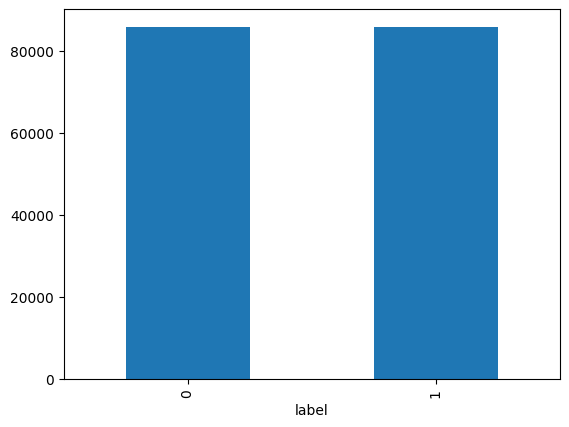

In [33]:
# Reset the index of the DataFrame (optional)
train.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(train.describe())
train['label'].value_counts().plot(kind='bar')

### normalize dataset

In [18]:
train.head()

,transcript_position,label,length,std,mean,seq_le
0,482,0,0.00533,4.02,84.2,6
1,597,0,0.00896,1.86,82.7,15
2,1929,0,0.00654,2.10,91.7,14
3,1504,0,0.00478,1.74,94.7,8
4,607,0,0.00531,2.31,96.9,2


In [19]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(train)
print(d)

[[0.02564514 0.         0.03849381 0.02537054 0.24154589 0.35294118]
 [0.03180212 0.         0.07656807 0.01094939 0.22342995 0.88235294]
 [0.10311597 0.         0.05118523 0.01255174 0.3321256  0.82352941]
 ...
 [0.08186101 1.         0.07656807 0.02316731 0.18599034 0.52941176]
 [0.08180747 1.         0.07656807 0.02316731 0.18599034 0.52941176]
 [0.08180747 1.         0.05569541 0.02456937 0.61352657 0.52941176]]


In [20]:
train = pd.DataFrame(d, columns=train.columns)

In [21]:
train.head()

,transcript_position,label,length,std,mean,seq_le
0,0.025645,0.0,0.038494,0.025371,0.241546,0.352941
1,0.031802,0.0,0.076568,0.010949,0.223430,0.882353
2,0.103116,0.0,0.051185,0.012552,0.332126,0.823529
3,0.080362,0.0,0.032725,0.010148,0.368357,0.470588
4,0.032338,0.0,0.038284,0.013954,0.394928,0.117647


In [22]:
import pickle

# save the model to a file
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# # load the model from the file
# with open('minmax_scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)

In [24]:
# clear RAM
del train

In [25]:
test = test.drop(["transcript_id", "sequence", "gene_id", "seq"], axis=1)

In [26]:
d = scaler.transform(test)
test = pd.DataFrame(d, columns=test.columns)
test.head()

,transcript_position,label,length,std,mean,seq_le
0,0.025056,0.0,0.090623,0.022700,0.333333,1.0
1,0.025003,0.0,0.090623,0.022700,0.333333,1.0
2,0.025003,0.0,0.114747,0.065963,0.722222,1.0
3,0.025056,0.0,0.198657,0.031112,0.339372,1.0
4,0.025003,0.0,0.198657,0.031112,0.339372,1.0


In [ ]:
# save the train and test data
train.to_csv('data/data_train.csv', index=False)
test.to_csv('data/data_test.csv', index=False)